 # Problem Statement


Our aim in this project is to predict if a person would buy an iPhone with respect to their gender, age, and income. We will also compare different classification algorithms..


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# Load the Data & Preview

In [2]:
data_set = pd.read_csv('iphone_purchase_records.csv')

In [3]:
data_set.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
data_set.shape

(400, 4)

# Check the datatypes of Features

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


# Categorical Feature Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

labelEncoder_gender = LabelEncoder()
data_set['Gender'] = labelEncoder_gender.fit_transform(data_set['Gender'])

In [7]:
data_set.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# Split Independent and Target Variable

In [8]:
X = data_set.drop('Purchase Iphone',axis=1)
y = data_set['Purchase Iphone']

# Train - Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0 , solver ='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Prediction

In [12]:
y_pred = classifier.predict(X_test)

# Evalution

In [13]:
data_set['Purchase Iphone'].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchase Iphone, dtype: float64

# Confusion matrix

In [14]:
from sklearn.metrics import plot_confusion_matrix,classification_report


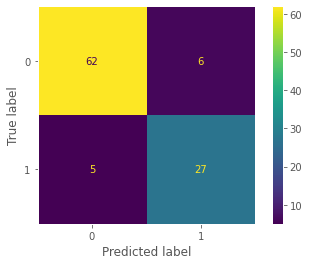

In [15]:
plot_confusion_matrix(classifier,X_test,y_test)
plt.grid()


In [16]:
print(classification_report(y_train,classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       189
           1       0.82      0.70      0.76       111

    accuracy                           0.83       300
   macro avg       0.83      0.81      0.82       300
weighted avg       0.83      0.83      0.83       300



In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



# Model Comparison

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
classification_model = []
classification_model.append(('LogisticRegression', LogisticRegression()))
classification_model.append(('KNeighborsClassifier', KNeighborsClassifier()))
classification_model.append(('Kernel SVM',SVC()))
classification_model.append(('Naive Bayes',GaussianNB()))
classification_model.append(('Decision Tree',DecisionTreeClassifier()))
classification_model.append(('Random Forest',RandomForestClassifier()))

# Scale  the data 

In [20]:
X = sc.fit_transform(X)

# Cross Validate to  Compare  Model 

In [21]:
classification_model

[('LogisticRegression', LogisticRegression()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Kernel SVM', SVC()),
 ('Naive Bayes', GaussianNB()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Random Forest', RandomForestClassifier())]

In [22]:
for name, model in classification_model:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  print(f'{name:20}: Mean Accuracy = {result.mean().round(2)*100}%, SD Accuracy = {result.std().round(2)}')

LogisticRegression  : Mean Accuracy = 84.0%, SD Accuracy = 0.05
KNeighborsClassifier: Mean Accuracy = 91.0%, SD Accuracy = 0.05
Kernel SVM          : Mean Accuracy = 91.0%, SD Accuracy = 0.05
Naive Bayes         : Mean Accuracy = 89.0%, SD Accuracy = 0.05
Decision Tree       : Mean Accuracy = 86.0%, SD Accuracy = 0.06
Random Forest       : Mean Accuracy = 88.0%, SD Accuracy = 0.05


# Conclusion

From the results, we can see that KNN and Kernel SVM have done better than the others for this particular dataset. So, we will shortlist these two for this project. This is precisely the same result that we would have arrived at by independently applying each of those algorithms.